In [1]:
import pandas as pd
import geopy as gp
import geopy.distance
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
metro1 = pd.read_csv("metro.csv", sep=',')
metro1.head()

,ID,Name,Line,Lat/Lon,Connections,Accessibility,Zone
0,433,Cornellà Centre,L5,41.357315951168 / 2.07044325855937,T1-T2-T3-R.1-R4,Adaptada,Zona 1
1,432,Gavarra,L5,41.3580221811863 / 2.07929676467967,NaN,Adaptada,Zona 1
2,431,Sant Ildefons,L5,41.3634004007812 / 2.08440567589003,NaN,Adaptada,Zona 1
3,430,Can Boixeres,L5,41.3665946412198 / 2.09152995763886,NaN,Adaptada,Zona 1
4,318,Hospital de Bellvitge,L1,41.3447089189291 / 2.10726442487254,NaN,Adaptada,Zona 1


In [3]:
def locsep(frame):
    frame["Lat/Lon"] = [frame["Lat/Lon"][i].replace("/",",") for i in range(len(frame["Lat/Lon"]))]
    return frame

In [4]:
metro1 = locsep(metro1)

In [5]:
L = metro1[["Line","Name","Lat/Lon"]]
L["Line"].unique()

array(['L5', 'L1', 'L3', 'TRAMVIA BLAU', 'TELEFÈRIC DE MONTJUÏC',
       'FUNICULAR DE MONTJUÏC', 'L2', 'L4', 'L9|L10', 'L11', 'L9', 'L10'], dtype=object)

In [6]:
L = metro1[["Line","Name","Lat/Lon"]]
L1 = L[L["Line"]=="L1"]
L2 = L[L["Line"]=="L2"]
L3 = L[L["Line"]=="L3"]
L4 = L[L["Line"]=="L4"]
L5 = L[L["Line"]=="L5"]
L11 = L[L["Line"]=="L11"]
L9 = L[L["Line"]=="L9"]
L10 = L[L["Line"]=="L10"]

In [7]:
def getorder(frame, init):
    frame.reset_index(inplace=True)
    frame.drop(["index"],inplace=True,axis=1)
    o=1
    order = np.zeros_like(frame.index)
    i =init
    order[init] = o
    o=o+1

    while not order.all()!=0.0:
        p1 = gp.Point(frame.loc[i, "Lat/Lon"])
        d = []
        dst1 = 100
        for j in frame.index:
            p2 = gp.Point(frame.loc[j,"Lat/Lon"])
            dst = gp.distance.distance(p1,p2).km
            if ((dst >0) and (dst<dst1)):
                if order[j]==0:
                    dst1 = dst
                    hh = j
        order[hh] = o
        o = o+1
        i = hh

    frame.insert(len(frame.columns),"Order",order)
    return(frame)

In [8]:
L10


,Line,Name,Lat/Lon
133,L10,Llefià,"41.4414636713731 , 2.21717679322061"
141,L10,Gorg,"41.4405503099384 , 2.23378679063874"
142,L10,La Salut,"41.4428407809102 , 2.22449035582457"


In [9]:
init = np.where(L1['Name']=='Hospital de Bellvitge')[0][0]
getorder(L1,init)
init = np.where(L2['Name']=='Paral.lel')[0][0]
getorder(L2,init)
init = np.where(L3['Name']=='Zona Universitària')[0][0]
getorder(L3,init)
init = np.where(L4['Name']=='La Pau')[0][0]
getorder(L4,init)
init = np.where(L5['Name']=='Cornellà Centre')[0][0]
getorder(L5,init)
init = np.where(L9['Name']=='Can Zam')[0][0]
getorder(L9,init)
init = np.where(L10['Name']=='Llefià')[0][0]
getorder(L10,init)
init = np.where(L11['Name']=='Trinitat Nova')[0][0]
getorder(L11,init)



C:\Users\USER\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Line,Name,Lat/Lon,Order
0,L11,Can Cuiàs,"41.4624102882077 , 2.17305678567444",5
1,L11,Ciutat Meridiana,"41.4608382477217 , 2.17466301080431",4
2,L11,Trinitat Nova,"41.4492023892058 , 2.18242313470227",1
3,L11,Casa de L'Aigua,"41.4513374981639 , 2.18495526862417",2
4,L11,Torre Baró | Vallbona,"41.4592282423821 , 2.17994975426971",3


In [13]:
L5.to_csv("L5.csv",sep = "\t",encoding = "UTF-8")
L1.to_csv("L1.csv",sep = "\t",encoding = "UTF-8")
L2.to_csv("L2.csv",sep = "\t",encoding = "UTF-8")
L3.to_csv("L3.csv",sep = "\t",encoding = "UTF-8")
L4.to_csv("L4.csv",sep = "\t",encoding = "UTF-8")
L9.to_csv("L9.csv",sep = "\t",encoding = "UTF-8")
L10.to_csv("L10.csv",sep = "\t",encoding = "UTF-8")
L11.to_csv("L11.csv",sep = "\t",encoding = "UTF-8")

In [10]:
L1edgelist=pd.read_excel("L1edgelist.xls")#edge list
L1nodelist=pd.read_excel("L1nodelist.xls")#node list

L2edgelist=pd.read_excel("L2edgelist.xls")#edge list
L2nodelist=pd.read_excel("L2nodelist.xls")#node list

L3edgelist=pd.read_excel("L3edgelist.xls")#edge list
L3nodelist=pd.read_excel("L3nodelist.xls")#node list

L4edgelist=pd.read_excel("L4edgelist.xls")#edge list
L4nodelist=pd.read_excel("L4nodelist.xls")#node list

L5edgelist=pd.read_excel("L5edgelist.xls")#edge list
L5nodelist=pd.read_excel("L5nodelist.xls")#node list

L9edgelist=pd.read_excel("L9edgelist.xls")#edge list
L9nodelist=pd.read_excel("L9nodelist.xls")#node list

L10edgelist=pd.read_excel("L10edgelist.xls")#edge list
L10nodelist=pd.read_excel("L10nodelist.xls")#node list

L11edgelist=pd.read_excel("L11edgelist.xls")#edge list
L11nodelist=pd.read_excel("L11nodelist.xls")#node list

In [15]:
L9edgelist


,nodo1,nodo2,line,weight,color
0,Can Zam,Singuerlín,L9,1.21,orange
1,Singuerlín,Església Major,L9,1.21,orange
2,Església Major,Fondo,L9,1.21,orange
3,Fondo,Can Peixauet,L9,1.21,orange


In [11]:
L10nodelist


,name,Lat/Lon
0,Llefià,"41.4414636713731 , 2.21717679322061"
1,La Salut,"41.4428407809102 , 2.22449035582457"
2,Gorg,"41.4405503099384 , 2.23378679063874"


In [12]:
cols = 'Lat/Lon'.split('/')
L1nodelist[cols] = L1nodelist['Lat/Lon'].str.split(',', expand=True)
L1nodelist = L1nodelist.drop(labels=['Lat/Lon'], axis=1)


cols = 'Lat/Lon'.split('/')
L2nodelist[cols] = L2nodelist['Lat/Lon'].str.split(',', expand=True)
L2nodelist = L2nodelist.drop(labels=['Lat/Lon'], axis=1)


cols = 'Lat/Lon'.split('/')
L3nodelist[cols] = L3nodelist['Lat/Lon'].str.split(',', expand=True)
L3nodelist = L3nodelist.drop(labels=['Lat/Lon'], axis=1)


cols = 'Lat/Lon'.split('/')
L4nodelist[cols] = L4nodelist['Lat/Lon'].str.split(',', expand=True)
L4nodelist = L4nodelist.drop(labels=['Lat/Lon'], axis=1)


cols = 'Lat/Lon'.split('/')
L5nodelist[cols] = L5nodelist['Lat/Lon'].str.split(',', expand=True)
L5nodelist = L5nodelist.drop(labels=['Lat/Lon'], axis=1)
L5nodelist.head()

cols = 'Lat/Lon'.split('/')
L9nodelist[cols] = L9nodelist['Lat/Lon'].str.split(',', expand=True)
L9nodelist = L9nodelist.drop(labels=['Lat/Lon'], axis=1)
L9nodelist.head()

cols = 'Lat/Lon'.split('/')
L10nodelist[cols] = L10nodelist['Lat/Lon'].str.split(',', expand=True)
L10nodelist = L10nodelist.drop(labels=['Lat/Lon'], axis=1)
L10nodelist.head()

cols = 'Lat/Lon'.split('/')
L11nodelist[cols] = L11nodelist['Lat/Lon'].str.split(',', expand=True)
L11nodelist = L11nodelist.drop(labels=['Lat/Lon'], axis=1)
L11nodelist.head()

,name,Lat,Lon
0,Trinitat Nova,41.4492023892058,2.18242313470227
1,Casa de L'Aigua,41.4513374981639,2.18495526862417
2,Torre Baró | Vallbona,41.4592282423821,2.17994975426971
3,Ciutat Meridiana,41.4608382477217,2.17466301080431
4,Can Cuiàs,41.4624102882077,2.17305678567444


In [13]:
g1 = nx.Graph()
g2 = nx.Graph()
g3 = nx.Graph()
g4 = nx.Graph()
g5 = nx.Graph()
g9 = nx.Graph()
g10 = nx.Graph()
g11 = nx.Graph()

In [14]:
# Add edges and edge attributes
for i, elrow in L1edgelist.iterrows():
    g1.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

for i, elrow in L2edgelist.iterrows():
    g2.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
    
for i, elrow in L3edgelist.iterrows():
    g3.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

for i, elrow in L4edgelist.iterrows():
    g4.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

for i, elrow in L5edgelist.iterrows():
    g5.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
    
for i, elrow in L9edgelist.iterrows():
    g9.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
    
for i, elrow in L10edgelist.iterrows():
    g10.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
    
for i, elrow in L11edgelist.iterrows():
    g11.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [15]:
# Add node attributes
for i, nlrow in L1nodelist.iterrows():
    g1.add_node(nlrow['name'], nlrow[1:].to_dict())
for i, nlrow in L2nodelist.iterrows():
    g2.add_node(nlrow['name'], nlrow[1:].to_dict())
for i, nlrow in L3nodelist.iterrows():
    g3.add_node(nlrow['name'], nlrow[1:].to_dict())
for i, nlrow in L4nodelist.iterrows():
    g4.add_node(nlrow['name'], nlrow[1:].to_dict())
for i, nlrow in L5nodelist.iterrows():
    g5.add_node(nlrow['name'], nlrow[1:].to_dict())
for i, nlrow in L9nodelist.iterrows():
    g9.add_node(nlrow['name'], nlrow[1:].to_dict())
for i, nlrow in L10nodelist.iterrows():
    g10.add_node(nlrow['name'], nlrow[1:].to_dict())
for i, nlrow in L11nodelist.iterrows():
    g11.add_node(nlrow['name'], nlrow[1:].to_dict())

In [19]:
#Summary stats
print('# of edges: {}'.format(g3.number_of_edges()))
print('# of nodes: {}'.format(g3.number_of_nodes()))

# of edges: 25
# of nodes: 26


In [18]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['Lat'], node[-1]['Lon']) for node in g.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
dict(list(node_positions.items()))

{'Alfons X': ('41.4124274518153 ', ' 2.16643944352259'),
 'Arc de Triomf': ('41.3923576815825 ', ' 2.18114567601345'),
 'Artigues Sant Adrià': ('41.4338278181095 ', ' 2.21768382981863'),
 'Av.Carrilet': ('41.3585530196421 ', ' 2.10266580260399'),
 'Bac de Roda': ('41.4151753337543 ', ' 2.19550432669064'),
 'Badal': ('41.3756059321753 ', ' 2.12744302393462'),
 'Badalona Pompeu Fabra': ('41.4491346834602 ', ' 2.24417083038483'),
 'Barceloneta': ('41.3818891152973 ', ' 2.18489341522917'),
 'Baró de Viver': ('41.4499647103183 ', ' 2.19957936831323'),
 'Bellvitge': ('41.351002103227 ', ' 2.11093265881712'),
 'Besòs': ('41.4199054057797 ', ' 2.21027029188204'),
 'Besòs Mar': ('41.415132745723 ', ' 2.21609189178864'),
 'Bogatell': ('41.3951337619307 ', ' 2.19201295462194'),
 "Camp de L'Arpa": ('41.4150761407851 ', ' 2.18149899491483'),
 'Can Boixeres': ('41.3665946412198 ', ' 2.09152995763886'),
 'Can Cuiàs': ('41.4624102882077 ', ' 2.17305678567444'),
 'Can Peixauet': ('41.443955768203 ', ' 

In [69]:
# Define data structure (list) of edge colors for plotting
edge_colors1 = [e[2]['color'] for e in g1.edges(data=True)]
edge_colors2 = [e[2]['color'] for e in g2.edges(data=True)]
edge_colors3 = [e[2]['color'] for e in g3.edges(data=True)]
edge_colors4 = [e[2]['color'] for e in g4.edges(data=True)]
edge_colors5 = [e[2]['color'] for e in g5.edges(data=True)]
edge_colors9 = [e[2]['color'] for e in g9.edges(data=True)]
edge_colors10 = [e[2]['color'] for e in g10.edges(data=True)]
edge_colors11 = [e[2]['color'] for e in g11.edges(data=True)]
# Preview first 10
#edge_colors3[0:10]

In [16]:
F = nx.compose(g1,g2)
F1=nx.compose(F,g3)
F2=nx.compose(F1,g4)
F3=nx.compose(F2,g5)
F4=nx.compose(F3,g9)
F5=nx.compose(F4,g10)
g=nx.compose(F5,g11)
#F4=nx.compose(F3,g9)
#F5=nx.compose(F4,H10)
#F6=nx.compose(F5,H11)

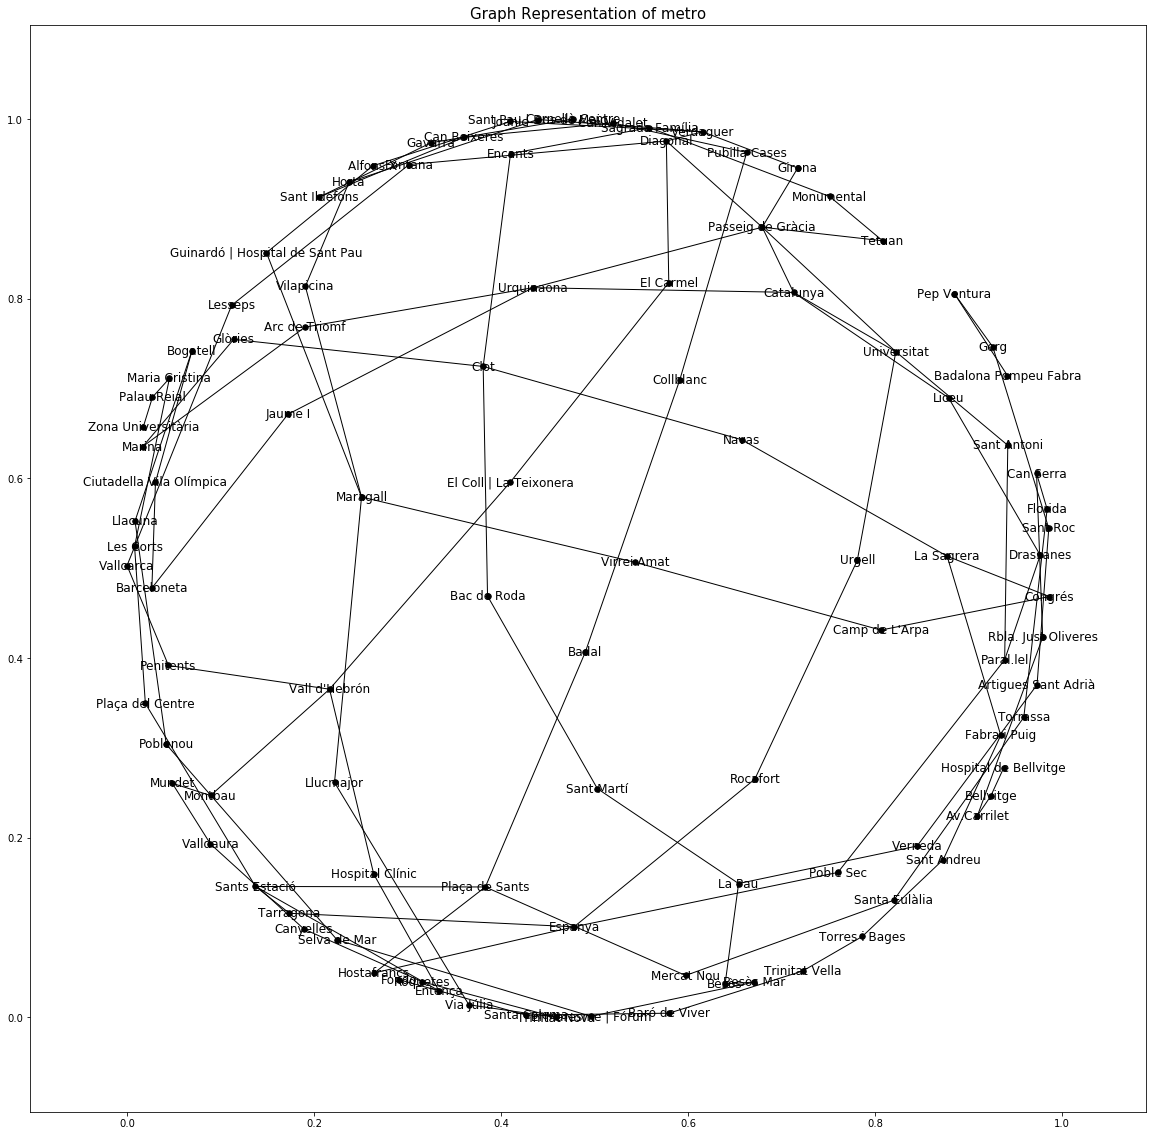

In [17]:
plt.figure(figsize=(20, 20))
#nx.draw(g, pos=node_positions, edge_color=edge_colors, node_size=10, node_color='black')
#nx.draw_networkx(g, edge_color=edge_colors, node_size=30, node_color='black')
nx.draw_networkx(F3, node_size=30, node_color='black')
plt.title('Graph Representation of metro', size=15)
plt.show()

In [40]:
L5.to_excel("L5.xls")
L1.to_excel("L1.xls")
L2.to_excel("L2.xls")
L3.to_excel("L3.xls")
L4.to_excel("L4.xls")
L9.to_excel("L9.xls")
L10.to_excel("L10.xls")
L11.to_excel("L11.xls")

In [51]:
weights= {"L1":0.92,"L2":0.76, "L3":0.71,"L4":0.79,"L5":0.74,"L9":1.21,"L10":0.92, "L11":0.42}

In [16]:
L1d = dict(zip(np.array(L1["Order"]),np.array(L1["Name"])))
L2d = dict(zip(np.array(L2["Order"]),np.array(L2["Name"])))
L3d = dict(zip(np.array(L3["Order"]),np.array(L3["Name"])))
L4d = dict(zip(np.array(L4["Order"]),np.array(L4["Name"])))
L5d = dict(zip(np.array(L5["Order"]),np.array(L5["Name"])))
L9d = dict(zip(np.array(L9["Order"]),np.array(L9["Name"])))
L10d = dict(zip(np.array(L10["Order"]),np.array(L10["Name"])))
L11d = dict(zip(np.array(L11["Order"]),np.array(L11["Name"])))
